# Store sales analysis - EDA process

## Install packages

In [1]:
install.packages("lubridate")
install.packages("caret")
install.packages("rpart")
install.packages("MLmetrics")
library(tidyverse) 
library(ggplot2)
library(lubridate)
library(caret)
library(rpart)
library(MLmetrics)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.1.8
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


The following 

## Preview and Prepare data


In [2]:
# read our dataset
df <- read.csv("../input/store-dataset/sample_store_df.csv")

In [3]:
glimpse(df)

Rows: 9,994
Columns: 21
$ Row.ID         <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, …
$ Order.ID       <chr> "CA-2019-152156", "CA-2019-152156", "CA-2019-138688", "…
$ Order.Date     <chr> "11/8/2019", "11/8/2019", "6/12/2019", "10/11/2018", "1…
$ Ship.Date      <chr> "11/11/2019", "11/11/2019", "6/16/2019", "10/18/2018", …
$ Ship.Mode      <chr> "Second Class", "Second Class", "Second Class", "Standa…
$ Customer.ID    <chr> "CG-12520", "CG-12520", "DV-13045", "SO-20335", "SO-203…
$ Customer.Name  <chr> "Claire Gute", "Claire Gute", "Darrin Van Huff", "Sean …
$ Segment        <chr> "Consumer", "Consumer", "Corporate", "Consumer", "Consu…
$ Country.Region <chr> "United States", "United States", "United States", "Uni…
$ City           <chr> "Henderson", "Henderson", "Los Angeles", "Fort Lauderda…
$ State          <chr> "Kentucky", "Kentucky", "California", "Florida", "Flori…
$ Postal.Code    <int> 42420, 42420, 90036, 33311, 33311, 90032, 90032, 90032,…
$ Region        

In [4]:
head(df)

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Country.Region,City,⋯,Postal.Code,Region,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>
1,1,CA-2019-152156,11/8/2019,11/11/2019,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,⋯,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,2,CA-2019-152156,11/8/2019,11/11/2019,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,⋯,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.9400,3,0.00,219.5820
3,3,CA-2019-138688,6/12/2019,6/16/2019,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,⋯,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,14.6200,2,0.00,6.8714
4,4,US-2018-108966,10/11/2018,10/18/2018,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,⋯,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,5,US-2018-108966,10/11/2018,10/18/2018,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,⋯,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
6,6,CA-2017-115812,6/9/2017,6/14/2017,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,⋯,90032,West,FUR-FU-10001487,Furniture,Furnishings,"Eldon Expressions Wood and Plastic Desk Accessories, Cherry Wood",48.8600,7,0.00,14.1694


In [5]:
# filter NA value
df <- df %>%
na.omit()

In [6]:
## check if Quantity contains value 0
df %>%
select(Quantity) %>%
filter(Quantity <= 0) 

Quantity
<int>


In [7]:
## convert Date format to YYYY-mm-dd
df <- df %>%
mutate(Order.Date = mdy(Order.Date),
      Ship.Date = mdy(Ship.Date),
      Year = year(Order.Date))

In [8]:
# change column 'Country.Region' name to Country
colnames(df)[9] <- "Country"

Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Country,City,⋯,Region,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Year
<int>,<chr>,<date>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
2624,CA-2020-127180,2020-10-22,2020-10-24,First Class,TA-21385,Tom Ashbrook,Home Office,United States,New York City,⋯,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.97,4,0.2,3919.989,2020
2698,CA-2017-145317,2017-03-18,2017-03-23,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,⋯,South,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferencing Unit,22638.48,6,0.5,-1811.078,2017
4191,CA-2020-166709,2020-11-17,2020-11-22,Standard Class,HL-15040,Hunter Lopez,Consumer,United States,Newark,⋯,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.97,3,0.0,5039.986,2020
6827,CA-2019-118689,2019-10-02,2019-10-09,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,⋯,Central,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.95,5,0.0,8399.976,2019
8154,CA-2020-140151,2020-03-23,2020-03-25,First Class,RB-19360,Raymond Buch,Consumer,United States,Seattle,⋯,West,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.96,4,0.0,6719.981,2020


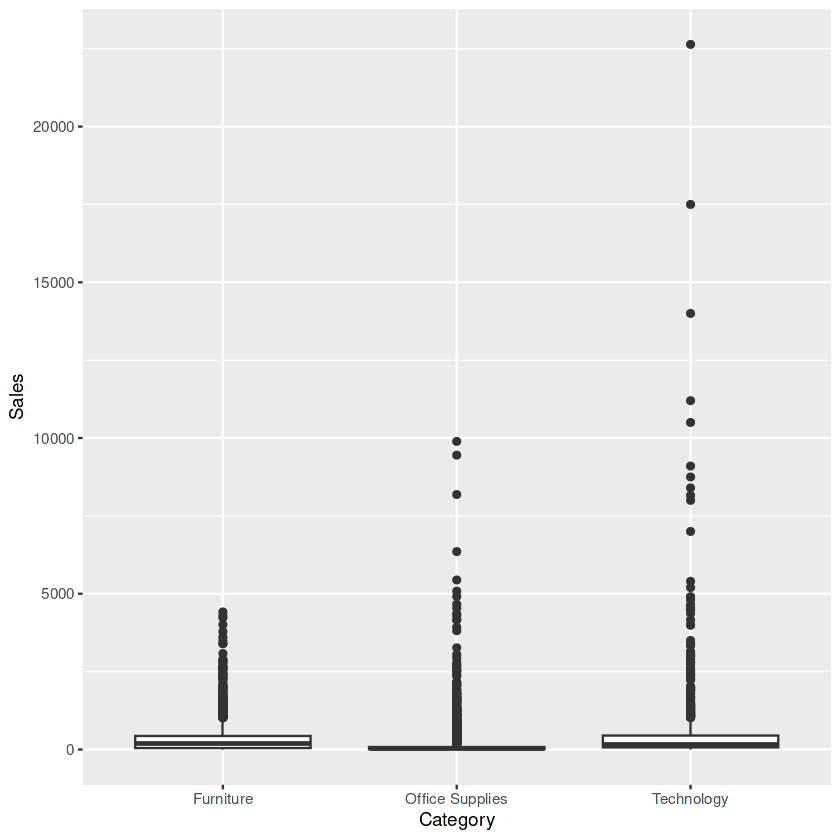

In [9]:
# detect & remove outlier 
ggplot(df, aes(Category,Sales)) +
geom_boxplot()

filter(df, Sales > 10000)
df <- df[-c(2623,2697,6825,4190,8152),]

In [10]:
# create a new cluster column
set.seed(17) 
(cluster <- kmeans(df$Sales,4))

df$Cluster <- cluster$cluster

K-means clustering with 4 clusters of sizes 8432, 1245, 262, 39

Cluster means:
        [,1]
1   77.10239
2  671.28804
3 1959.01367
4 5468.99033

Clustering vector:
   [1] 1 2 1 2 1 1 1 2 1 1 3 2 1 2 1 1 2 1 1 1 1 1 1 1 2 1 1 3 1 1 1 1 1 1 1 2 1
  [38] 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1
  [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [112] 1 1 1 1 1 1 2 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 2
 [149] 1 3 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 4 1 3 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 1 1
 [186] 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1
 [223] 1 2 1 1 2 1 1 2 1 1 2 1 1 2 1 1 2 1 1 1 1 1 3 1 1 3 1 1 1 3 1 1 1 1 1 2 1
 [260] 1 1 1 3 3 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 1 1 1 1
 [297] 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 2 1 1 1 1
 [334] 1 1 2 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 4 2 1 1 1 1 2 1 1 2 1 1 1 1 1 1 2
 [371] 1 1 1 2 1 2 1 3 1 

In [11]:
# convert data type from integer to character
df$Cluster <- as.character(df$Cluster)

In [12]:
# remove segment column
df <- df[,-8]

In [13]:
## write csv
write.csv(df,"cleaned_df.csv",row.names = F)

#### Conclusion:
* #### Store dataset contains 9,982 rows and 22 columns
* #### There is no missing value in the dataset
* #### 5 outliers were detected and removed for better view in visualization processing
* #### Our dataset was seperated to 4 clusters using kmeans() 
* #### Dataset contains 4 data types which are character, integer, date and double
* #### Date format of Order.Date and Ship.Date were changed from MM-DD-YYYY to YYYY-MM-DD format
* #### Dataset contains 2 date variables : Order.Date and Ship.Date
* #### Dataset contains 9 categorical variables : Ship.Mode,Country, City, State, Region, Category, Sub.Category, Cluster and Year
* #### Dataset contains 6 numeric variables : Row.ID, Sales, Quantity, Discount and Profit

## Data Description

### Numerical Variables descriptions

In [14]:
df %>% select(Sales,Quantity,Discount,Profit) %>% summary()

df %>% summarise(Std_Sales = sd(Sales),
                Std_Quantity = sd(Quantity),
                Std_Discount = sd(Discount),
                Std_Profit = sd(Profit)) %>%
                pivot_longer(cols = c("Std_Sales", "Std_Quantity","Std_Discount","Std_Profit"),
                         names_to = "Variable", values_to = "Value")

     Sales             Quantity         Discount          Profit         
 Min.   :   0.444   Min.   : 1.000   Min.   :0.0000   Min.   :-6599.978  
 1st Qu.:  17.256   1st Qu.: 2.000   1st Qu.:0.0000   1st Qu.:    1.727  
 Median :  54.328   Median : 3.000   Median :0.2000   Median :    8.638  
 Mean   : 221.731   Mean   : 3.788   Mean   :0.1564   Mean   :   26.246  
 3rd Qu.: 209.700   3rd Qu.: 5.000   3rd Qu.:0.2000   3rd Qu.:   29.267  
 Max.   :9892.740   Max.   :14.000   Max.   :0.8000   Max.   : 4946.370  

Variable,Value
<chr>,<dbl>
Std_Sales,514.8162798
Std_Quantity,2.2239637
Std_Discount,0.2065053
Std_Profit,197.3549780


### Categorical Variables descriptions

#### Count unique values of categorical variables

In [15]:
(cate_df <- df %>% 
  summarise(Ship_Mode = n_distinct(Ship.Mode),
            City = n_distinct(City),
            State = n_distinct(State),
            Region = n_distinct(Region),
            Category = n_distinct(Category),
            Sub_Category = n_distinct(Sub.Category),
            Country =  n_distinct(Country), 
            Cluster = n_distinct(Cluster),
            Year = n_distinct(Year)) %>%
            pivot_longer(cols = c("Ship_Mode","Country","City","State","Region","Category","Sub_Category",, "Cluster","Year"),
                         names_to = "Variable", values_to = "Value"))

Variable,Value
<chr>,<int>
Ship_Mode,4
Country,1
City,531
State,48
Region,4
Category,3
Sub_Category,17
Cluster,4
Year,4


## Correlation of numerical varaibles

#### Correlation value measures the relationship between two variables (ranging from -1 to +1).  A value closer to -1 or +1 indicates a stronger 

#### relationship (-1 is negative and +1 is positive), while a value closer to 0 suggests a weaker or no relationship. 




In [16]:
df %>%
select(Sales,Quantity,Discount,Profit) %>%
cor()

,Sales,Quantity,Discount,Profit
Sales,1.00000000,0.23602812,-0.03484953,0.39859361
Quantity,0.23602812,1.00000000,0.00877657,0.07666724
Discount,-0.03484953,0.00877657,1.00000000,-0.25128174
Profit,0.39859361,0.07666724,-0.25128174,1.00000000


#### Conclusion:
* #### There is a slightly weak relationship between Sales and Profit
* #### There is no significant relationship between Profit and other variables
* #### There is a weak positive relationship between Sales and Quantity but not really significant

## Visualize categorical varibales


### Bar chart shows numbers of observations of each categorical variables

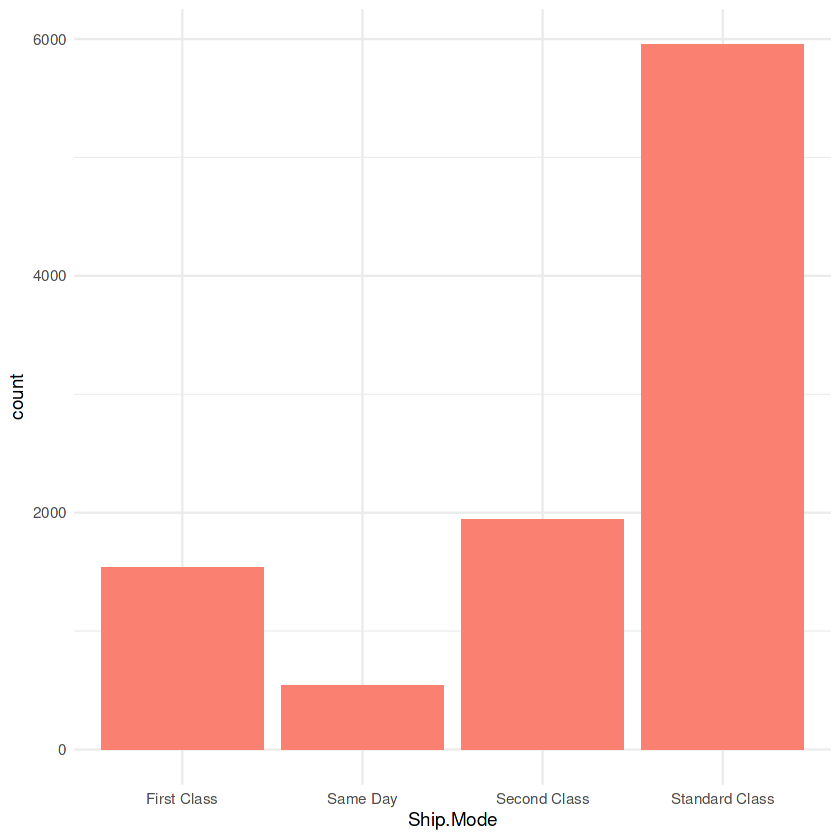

In [17]:
# Ship.Mode
ggplot(df, aes(Ship.Mode)) +
      geom_bar(fill = "salmon") +
      theme_minimal()

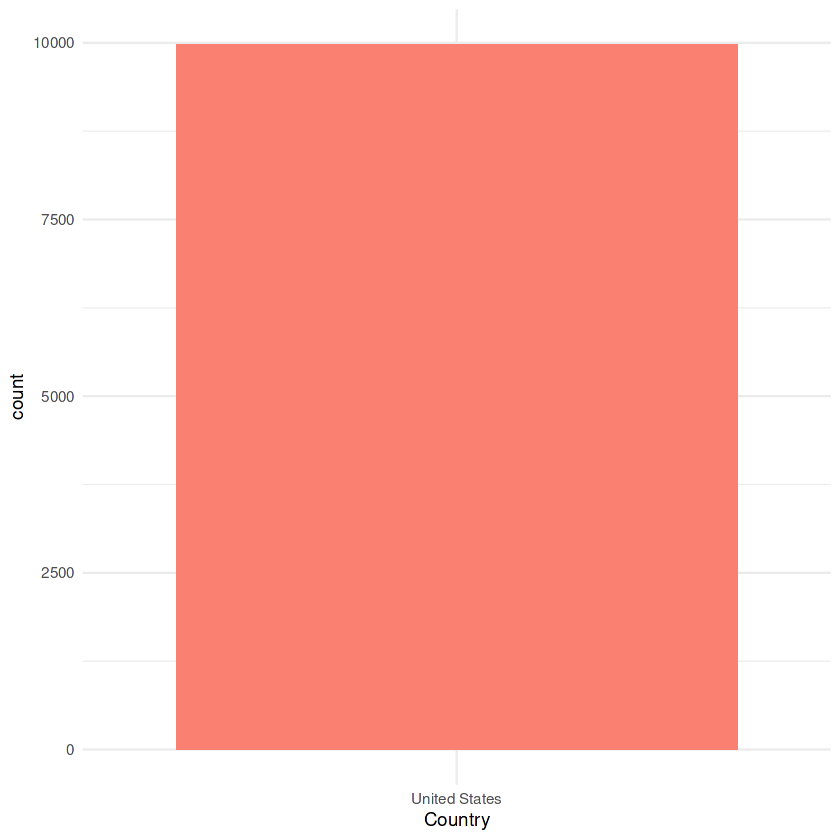

In [18]:
# Country
ggplot(df, aes(Country)) +
      geom_bar(fill = "salmon") +
      theme_minimal()

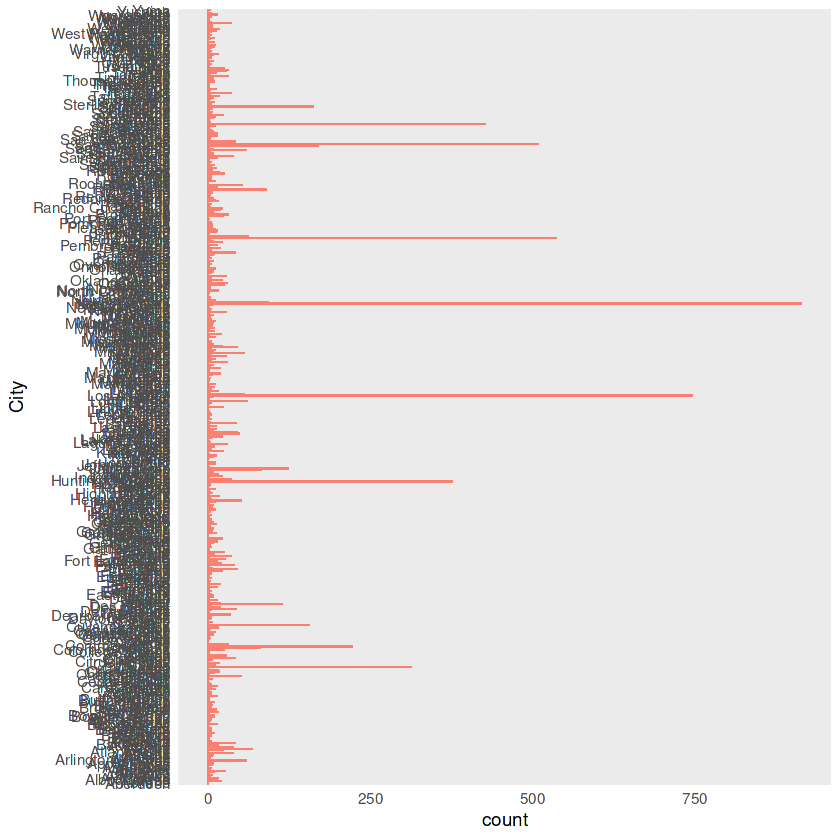

In [19]:
# City
ggplot(df, aes(City)) +
      geom_bar(fill = "salmon") +
      theme_minimal() +
      coord_flip()

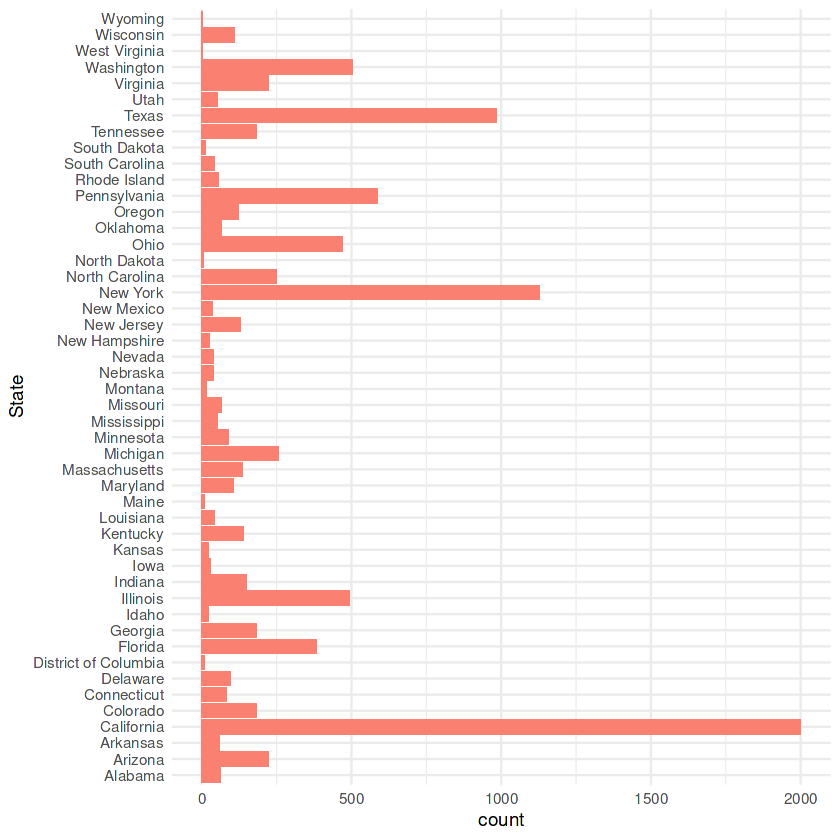

In [20]:
# State
ggplot(df, aes(State)) +
      geom_bar(fill = "salmon") +
      theme_minimal() +
      coord_flip()

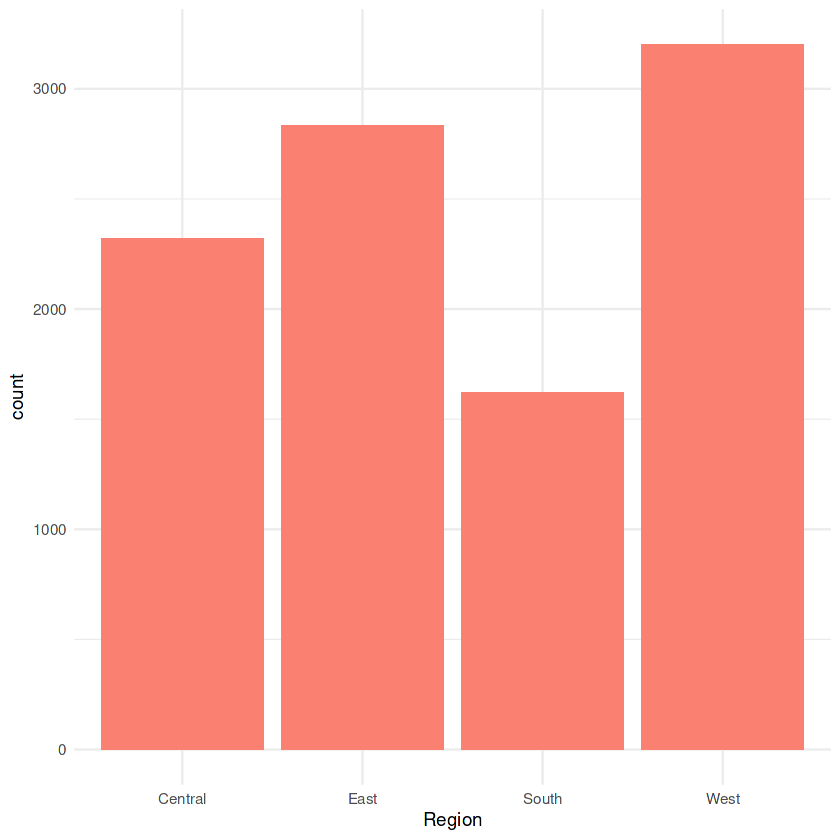

In [21]:
# Category
ggplot(df, aes(Region)) +
      geom_bar(fill = "salmon") +
      theme_minimal()

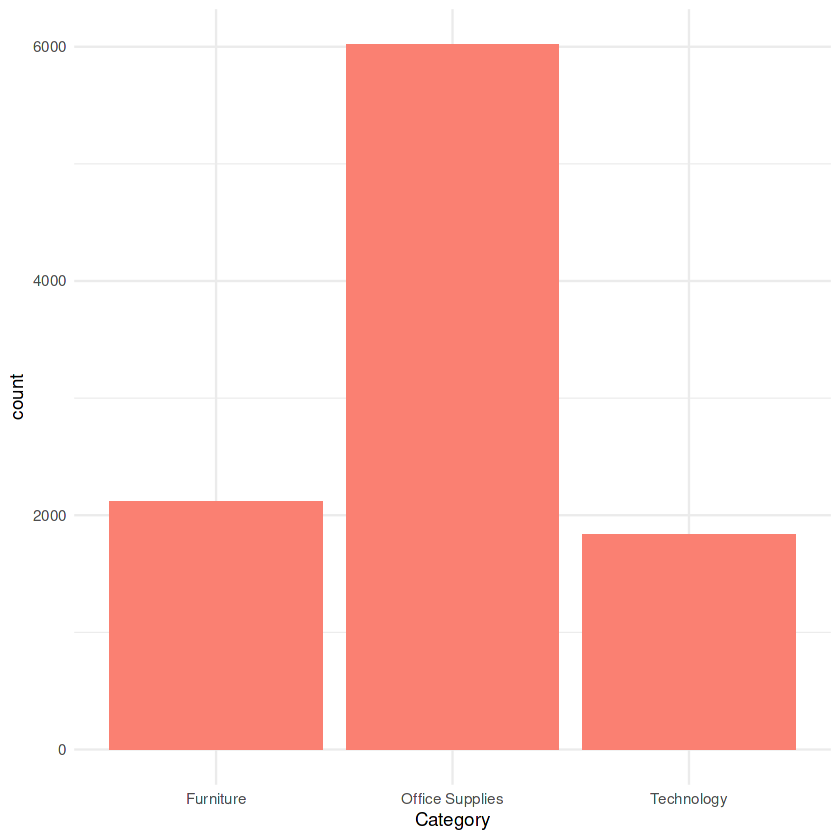

In [22]:
# Category
ggplot(df, aes(Category)) +
      geom_bar(fill = "salmon") +
      theme_minimal()

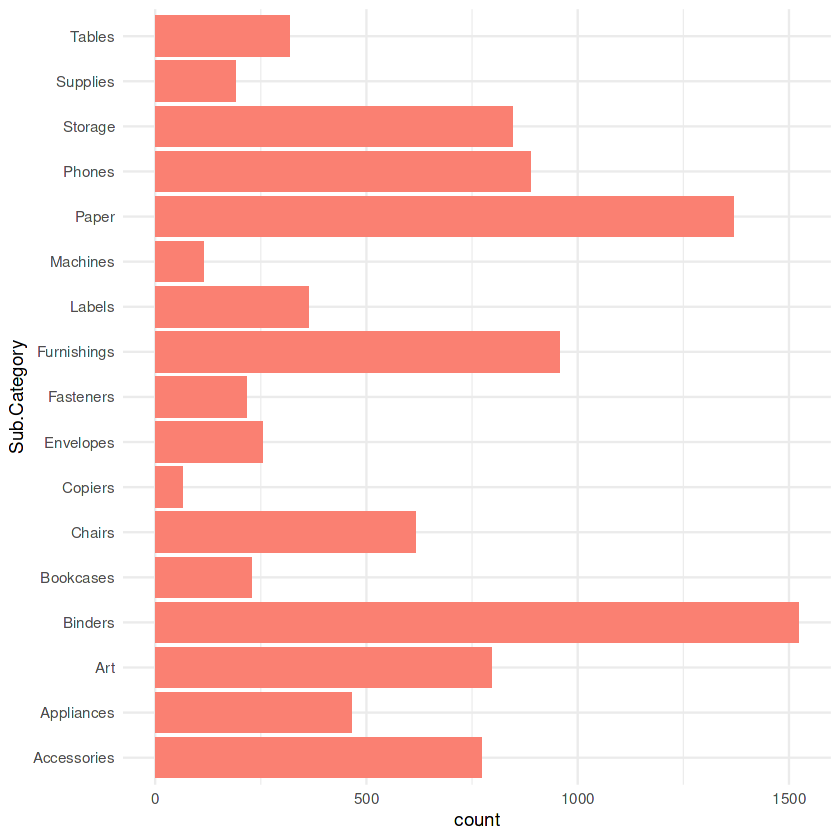

In [23]:
# Sub.Category
ggplot(df, aes(Sub.Category)) +
      geom_bar(fill = "salmon") +
      theme_minimal() +
      coord_flip()

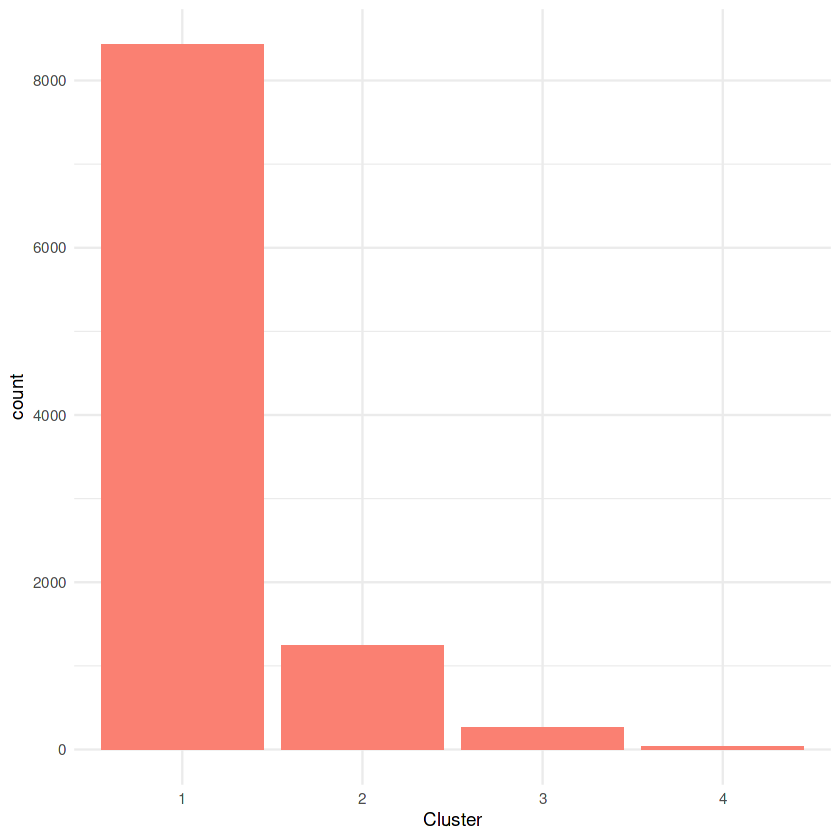

In [24]:
# Cluster
ggplot(df, aes(Cluster)) +
      geom_bar(fill = "salmon") +
      theme_minimal()

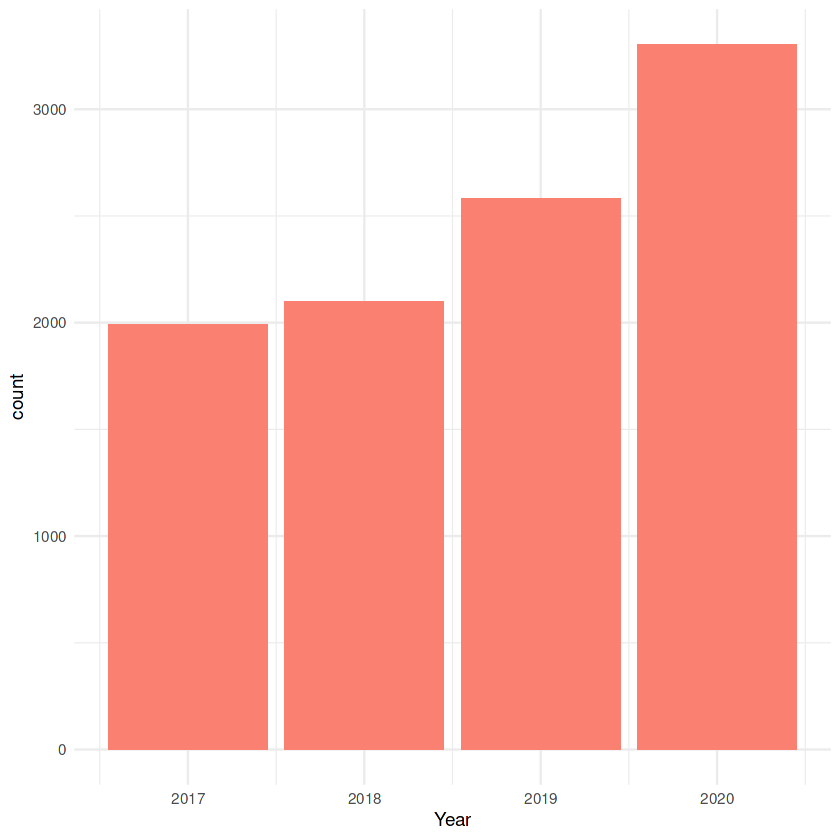

In [25]:
# Year
ggplot(df, aes(Year)) +
      geom_bar(fill = "salmon") +
      theme_minimal()

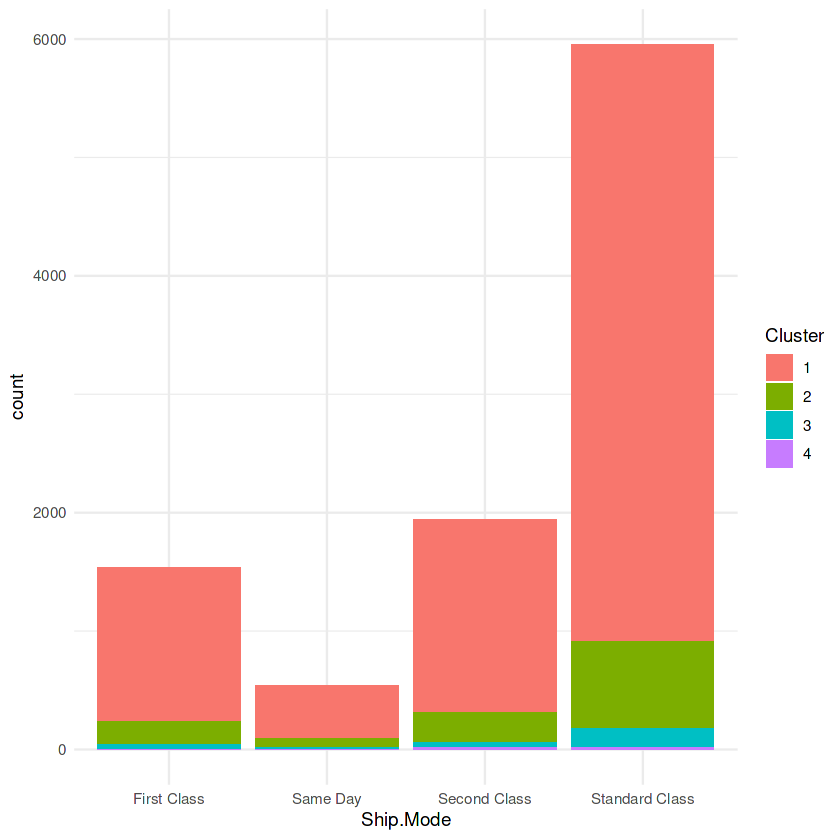

In [26]:
# Ship.Mode group by Cluster
ggplot(df, aes(Ship.Mode, fill = Cluster)) +
      geom_bar() +
      theme_minimal()

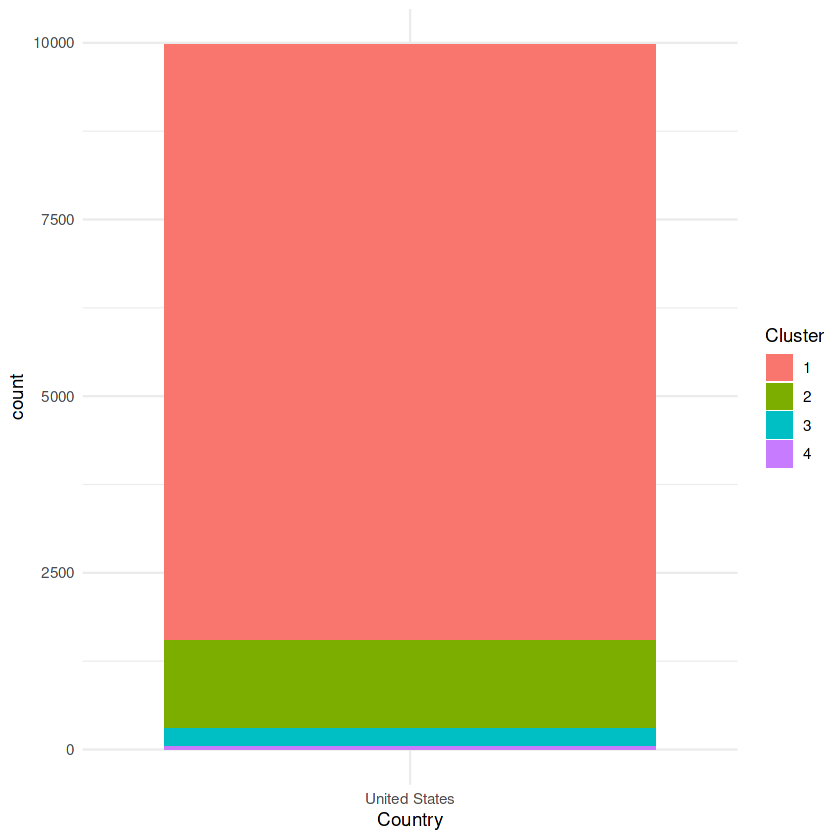

In [27]:
# Country group by Cluster
ggplot(df, aes(Country, fill = Cluster)) +
      geom_bar() +
      theme_minimal()

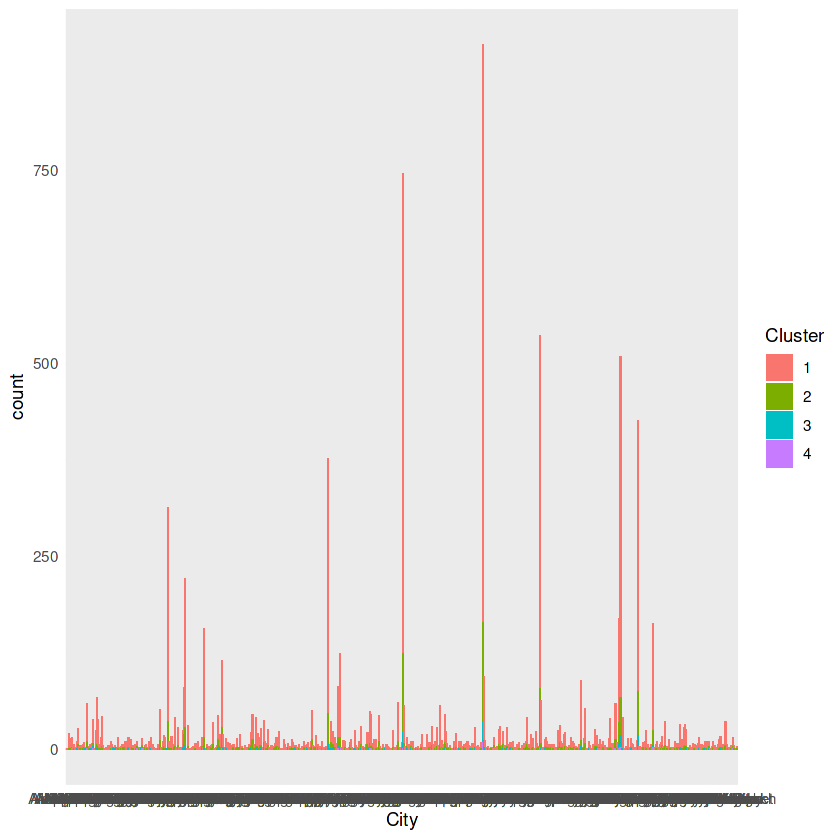

In [28]:
# City group by Cluster
ggplot(df, aes(City, fill = Cluster)) +
      geom_bar() +
      theme_minimal()

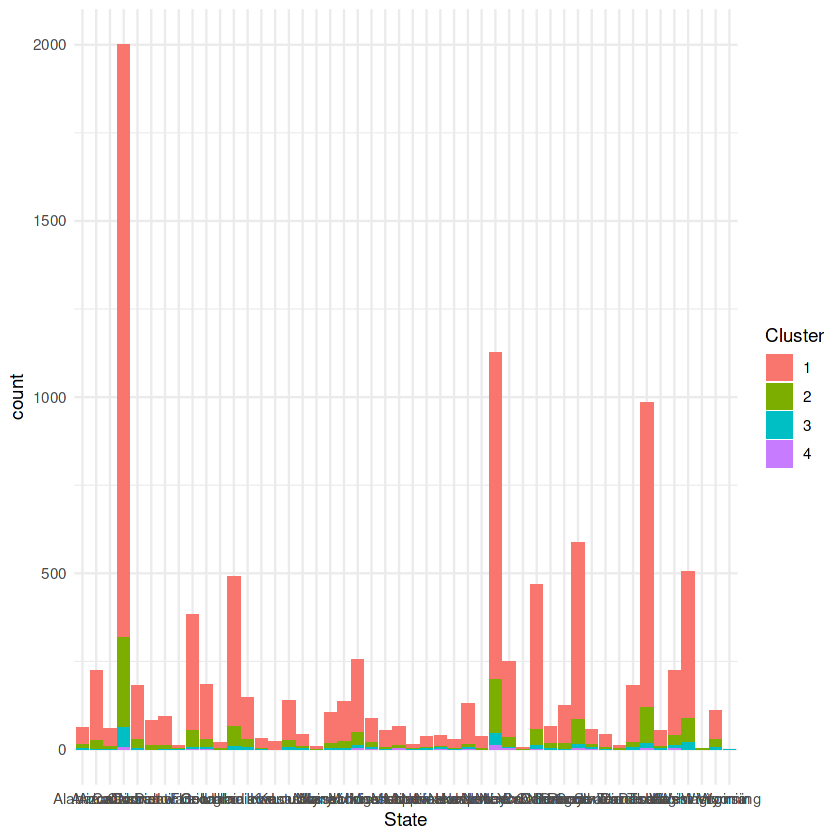

In [29]:
# State group by Cluster
ggplot(df, aes(State, fill = Cluster)) +
      geom_bar() +
      theme_minimal()

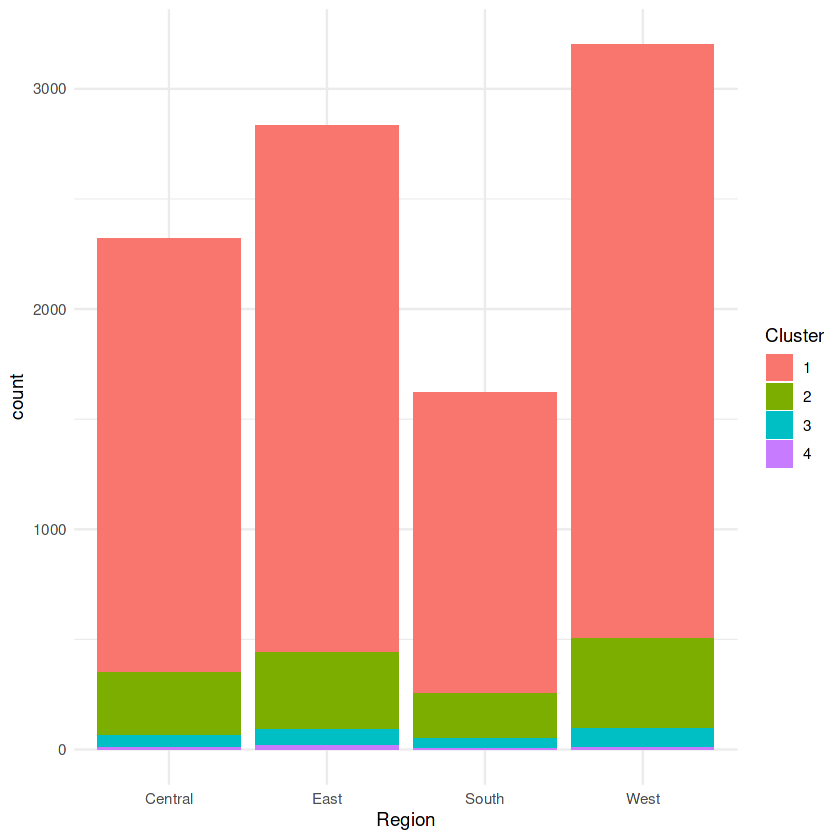

In [30]:
# Region group by Cluster
ggplot(df, aes(Region, fill = Cluster)) +
      geom_bar() +
      theme_minimal()

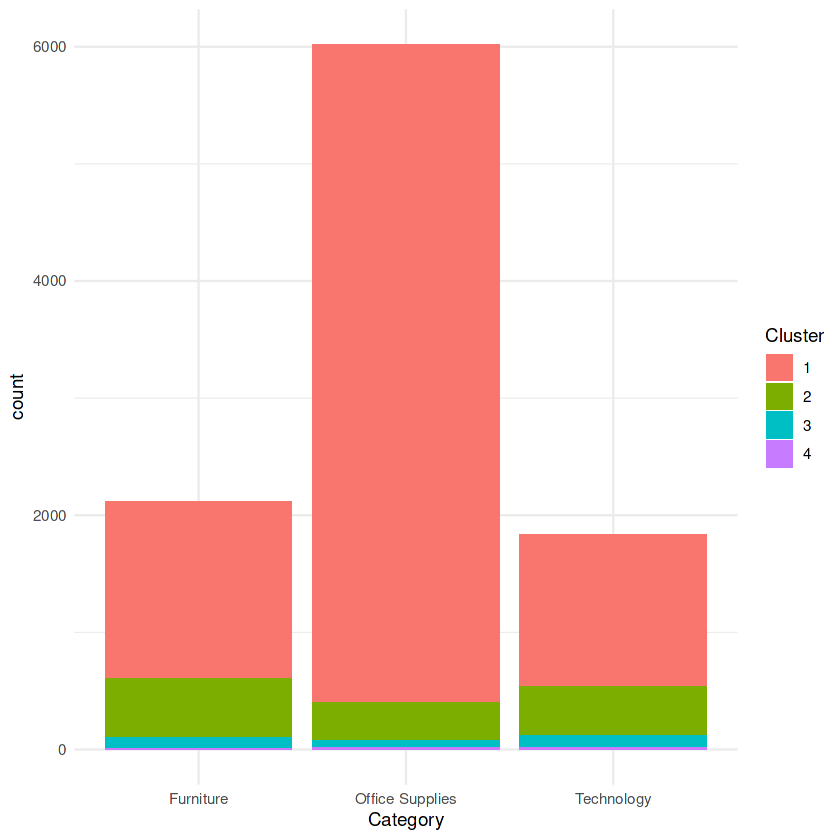

In [31]:
# Category group by Cluster
ggplot(df, aes(Category, fill = Cluster)) +
      geom_bar() +
      theme_minimal()

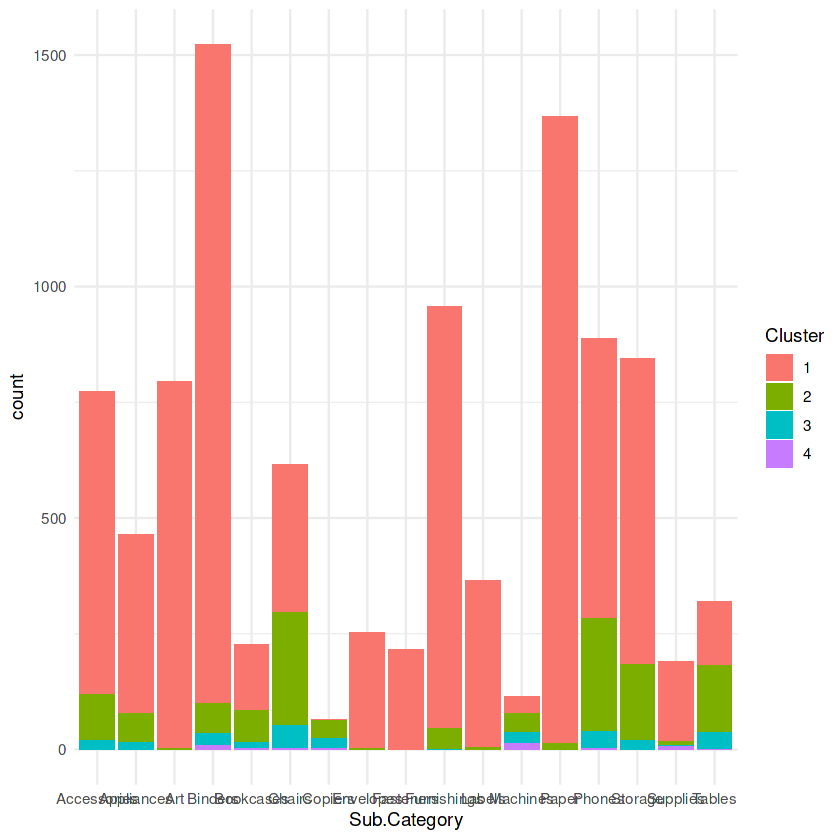

In [32]:
# Sub.Category group by Cluster
ggplot(df, aes(Sub.Category, fill = Cluster)) +
      geom_bar() +
      theme_minimal()

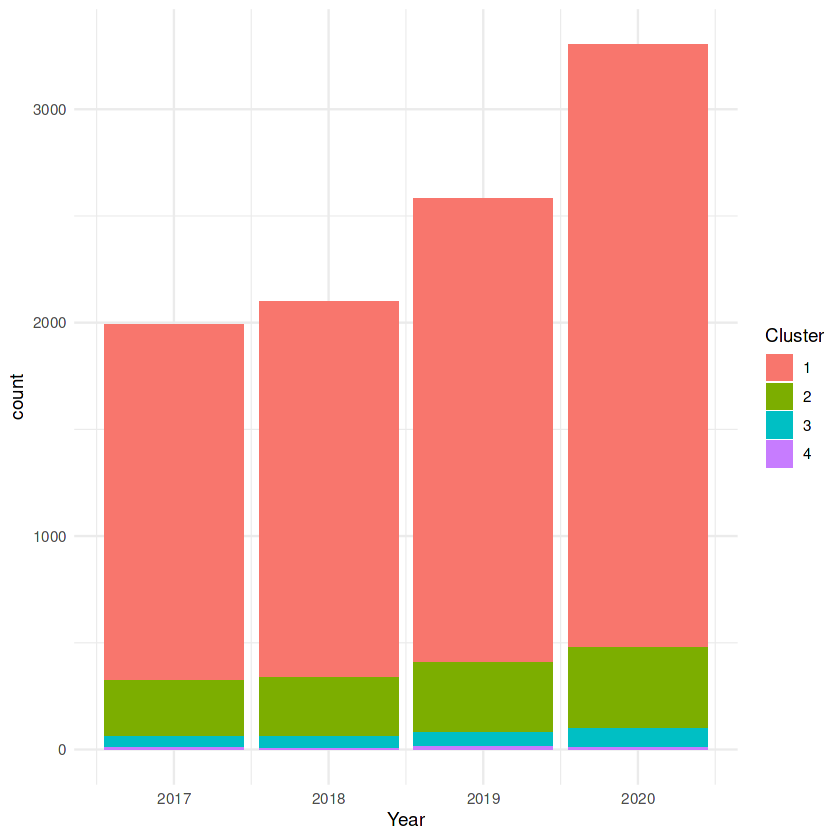

In [33]:
# Year group by Cluster
ggplot(df, aes(Year, fill = Cluster)) +
      geom_bar() +
      theme_minimal()

#### Conclusion :
* #### There are some huge difference of frequencies between variables in Ship.Mode, City, State, Category and Sub.Category.
* #### In Ship.Mode, Standard class has the most observations.
* #### In State, California has the most observations.
* #### In Region, West region has the most observations.
* #### In Categoy, Office supplies has the most observations.
* #### The number of sales have been increasing every year.

## Visualize Numerical variables

### Histogram

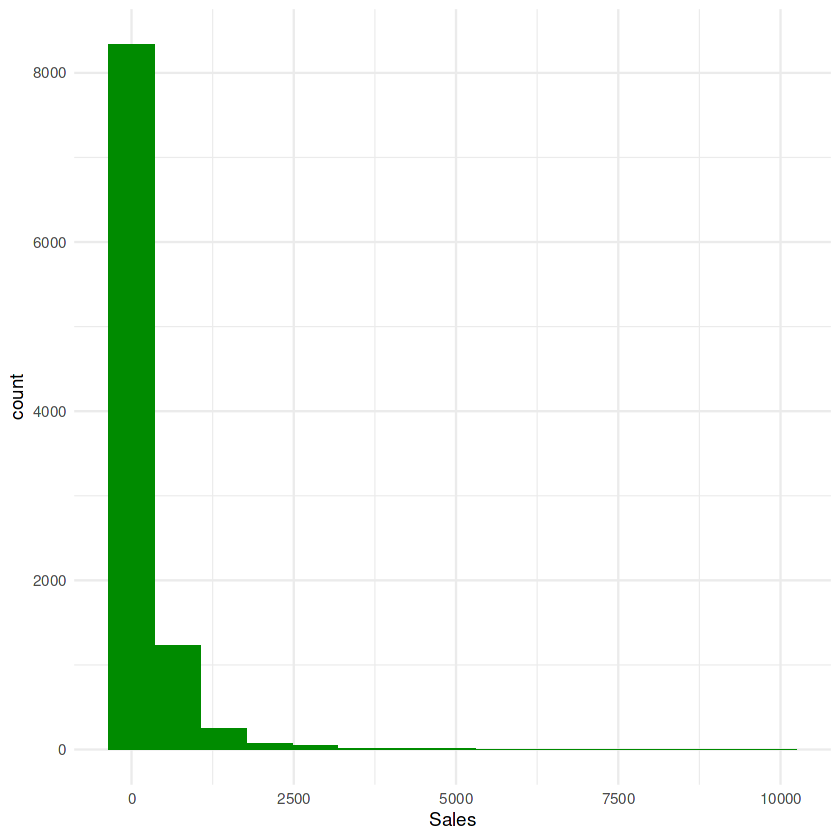

In [34]:
# Sales
ggplot(df, aes(Sales)) +
geom_histogram(bins = 15, fill = "green4") +
theme_minimal()

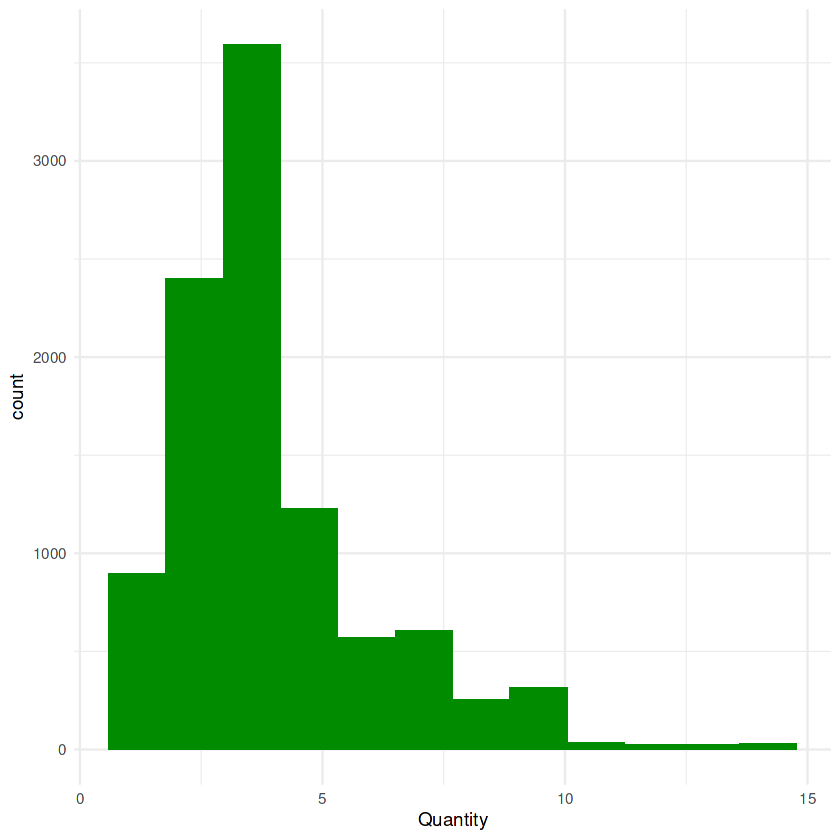

In [35]:
# Quantity
ggplot(df, aes(Quantity)) +
geom_histogram(bins = 12, fill = "green4") +
theme_minimal()

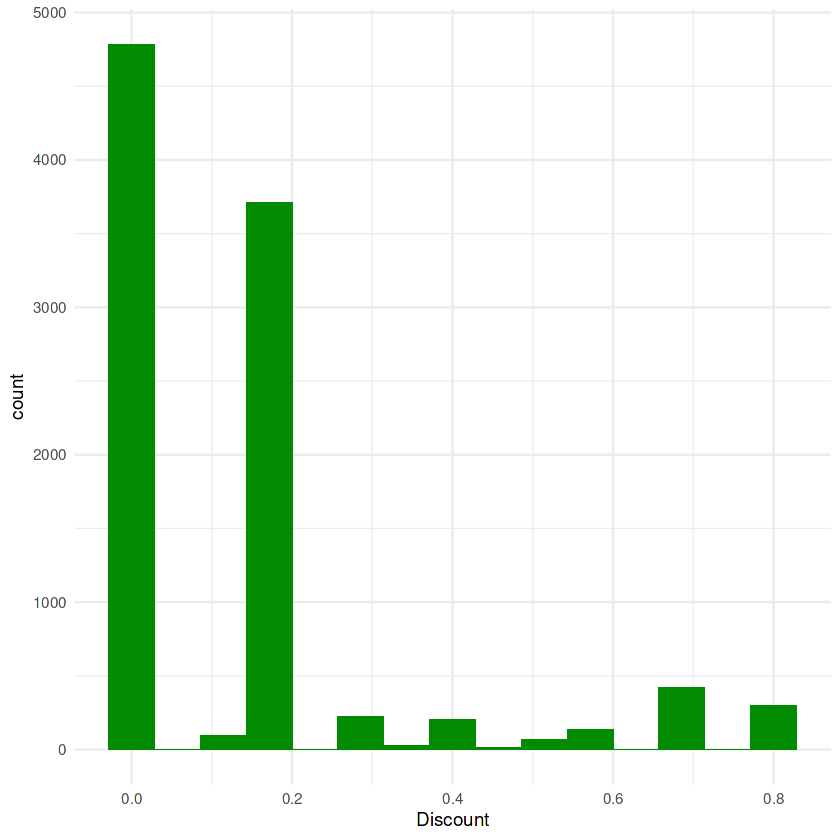

In [36]:
# Discount
ggplot(df, aes(Discount)) +
geom_histogram(bins = 15, fill = "green4") +
theme_minimal()

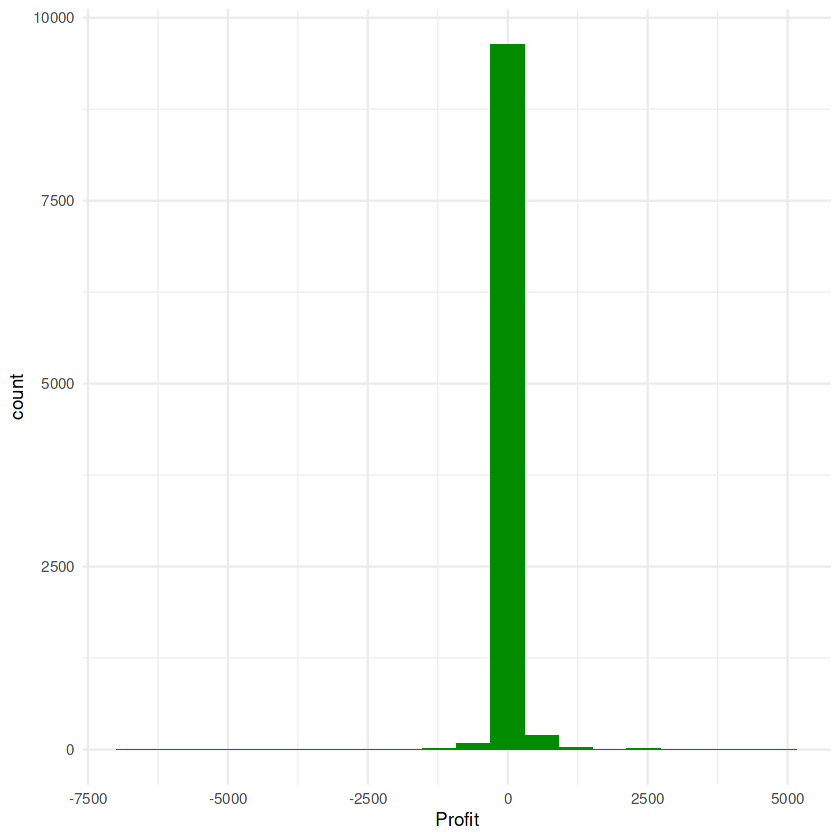

In [37]:
# Profit
ggplot(df, aes(Profit)) +
geom_histogram(bins = 20, fill = "green4") +
theme_minimal()

#### Conclusion:
* #### Most of the sales run between 0 to 1250.
* #### Most of the quantities run between 1 to 3.
* #### Most of the discounts was provided between 0 to 0.2.
* #### Most of the products have the profits below 2000.

### Boxplot

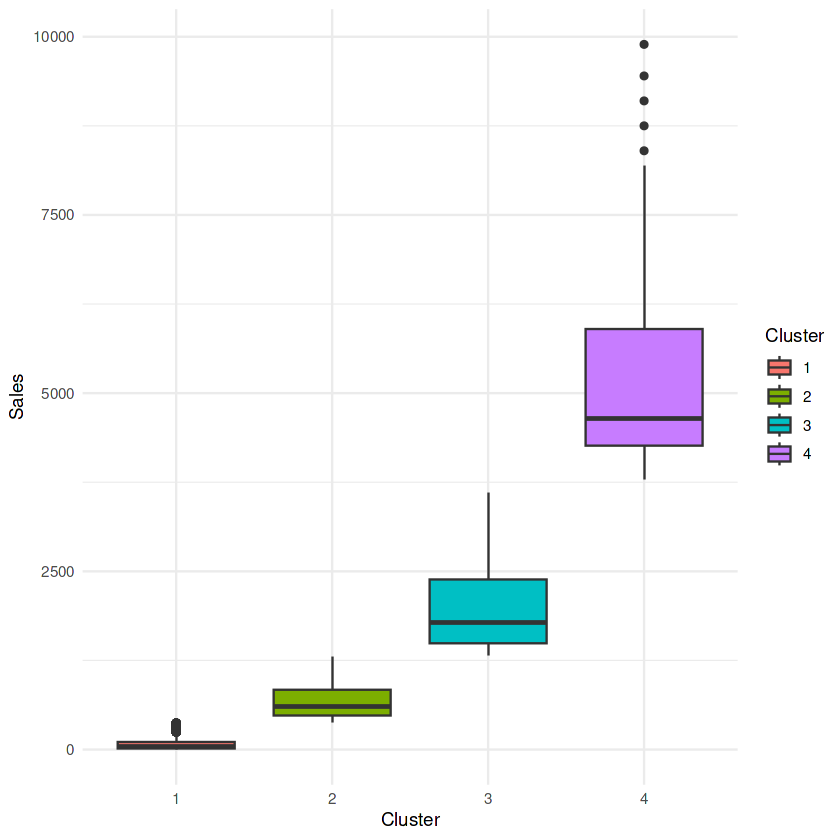

In [38]:
# Sales
ggplot(df, aes(Cluster,Sales, fill = Cluster)) +
geom_boxplot() +
theme_minimal()

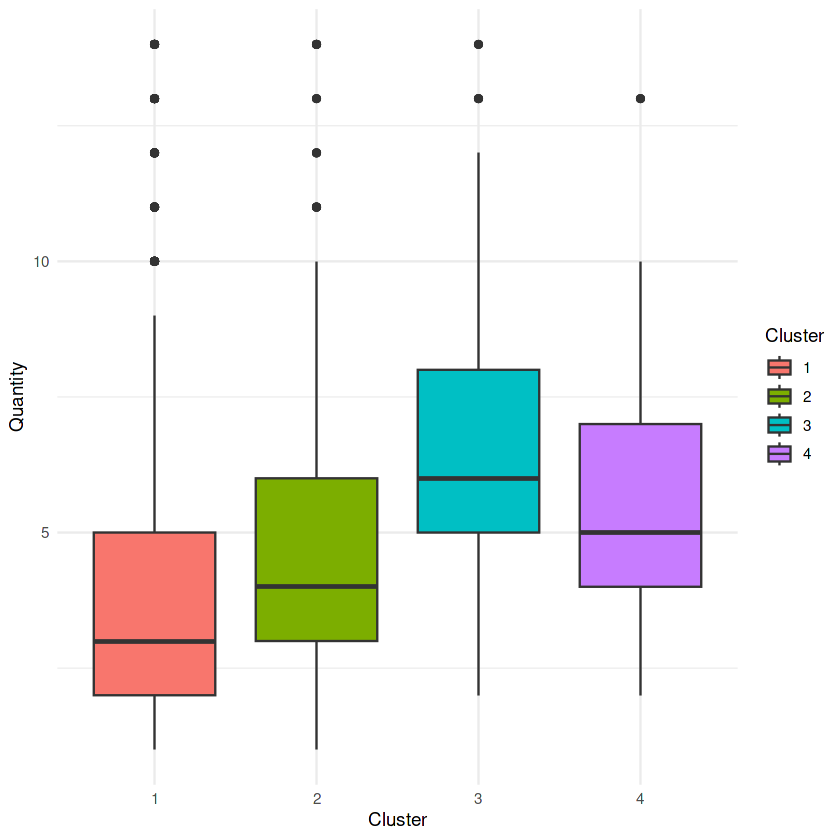

In [39]:
# Quantity
ggplot(df, aes(Cluster,Quantity, fill = Cluster)) +
geom_boxplot() +
theme_minimal()

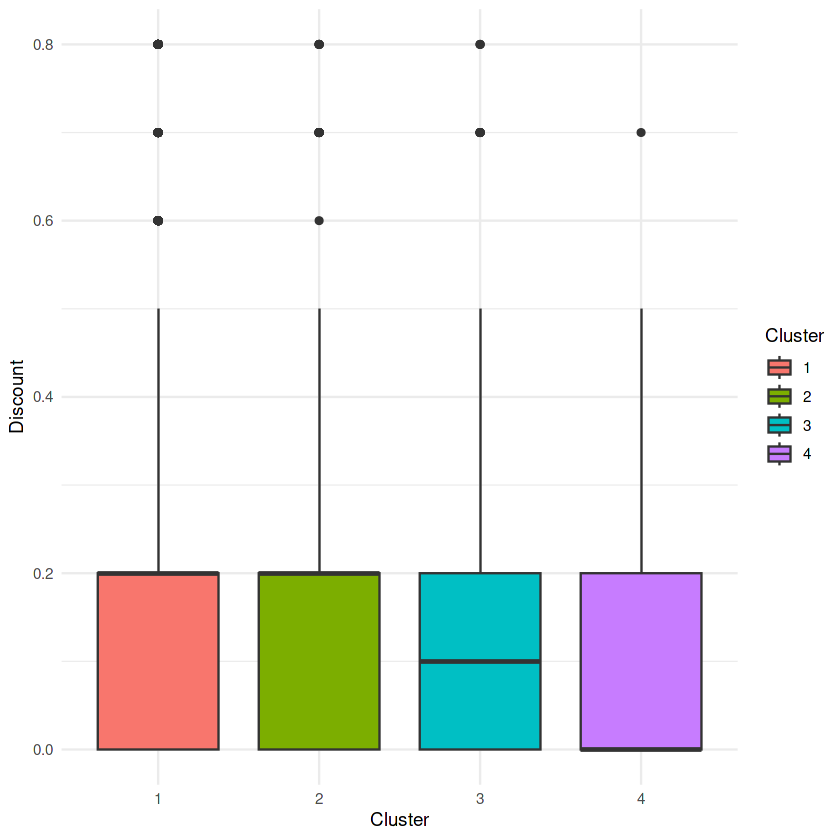

In [40]:
# Discount
ggplot(df, aes(Cluster,Discount, fill = Cluster)) +
geom_boxplot() +
theme_minimal()

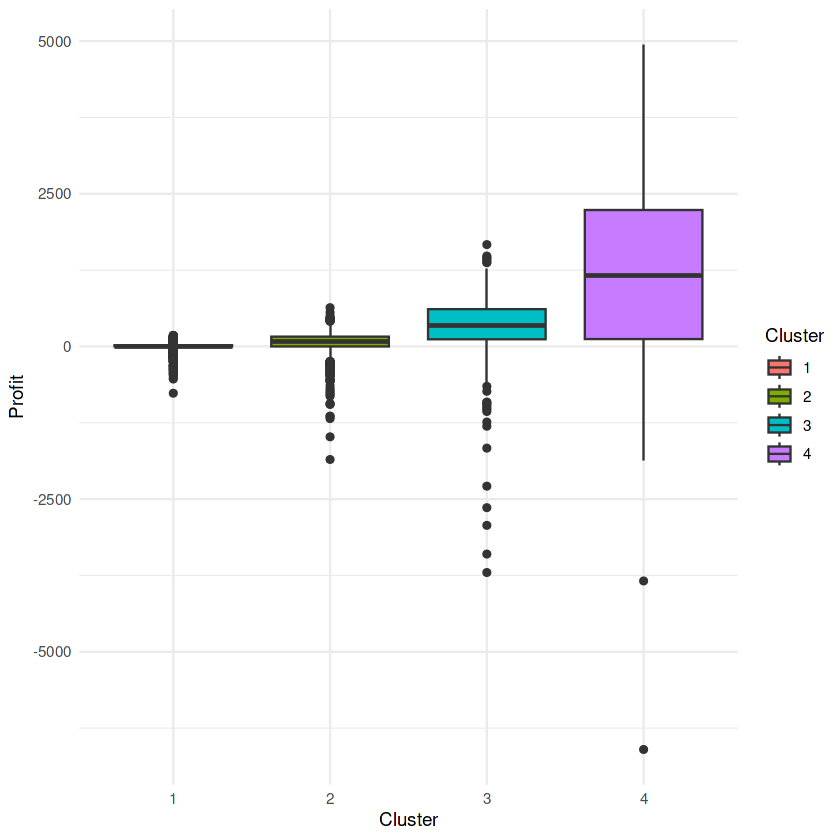

In [41]:
# Profit
ggplot(df, aes(Cluster,Profit, fill = Cluster)) +
geom_boxplot() +
theme_minimal()

#### Conclusion:
* #### All clusters mostly have the sales below 6000.
* #### All clusters mostly have the quantities below 8.
* #### 50% of all clusters have the discounts below 0.2.
* #### 50% of cluster 4 products generated profit between 0 - 5000.

### Scatter plot

`geom_smooth()` using formula = 'y ~ x'


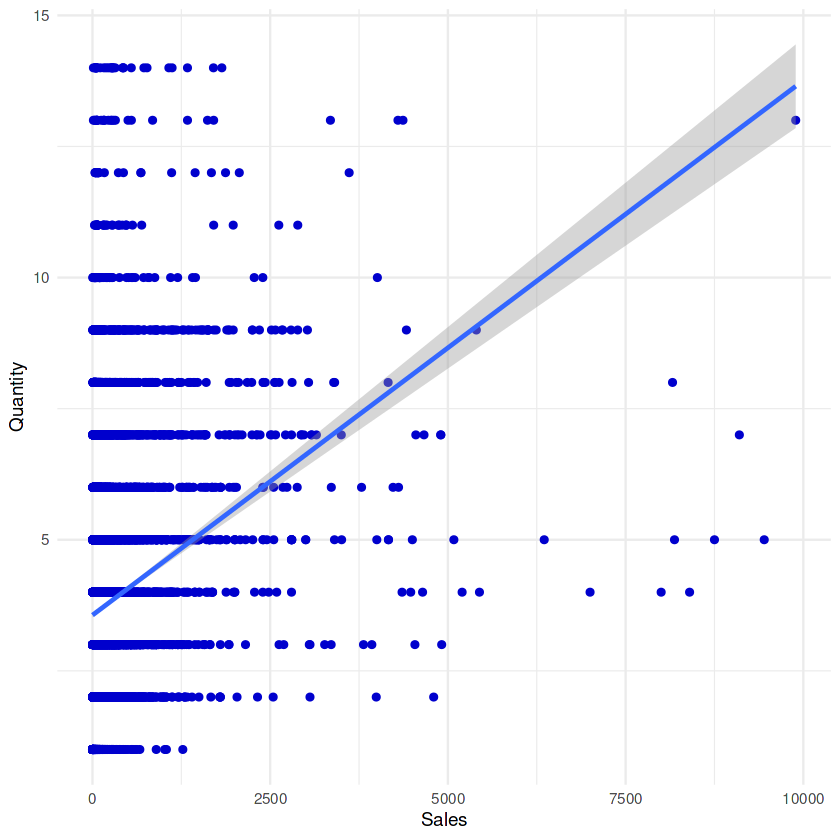

In [42]:
# Sales and Quantity
ggplot(df, aes(Sales,Quantity)) +
geom_point(col = "blue3") +
geom_smooth(method = 'lm') +
theme_minimal() 

`geom_smooth()` using formula = 'y ~ x'


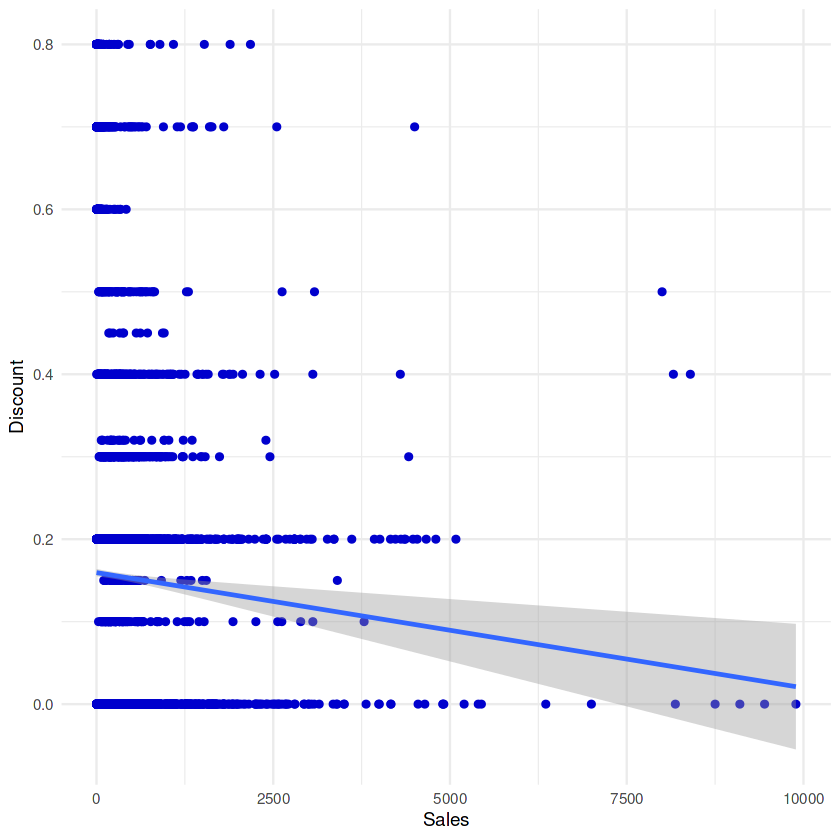

In [43]:
# Sales and Discount
ggplot(df, aes(Sales,Discount)) +
geom_point(col = "blue3") +
geom_smooth(method = 'lm') +
theme_minimal()

`geom_smooth()` using formula = 'y ~ x'


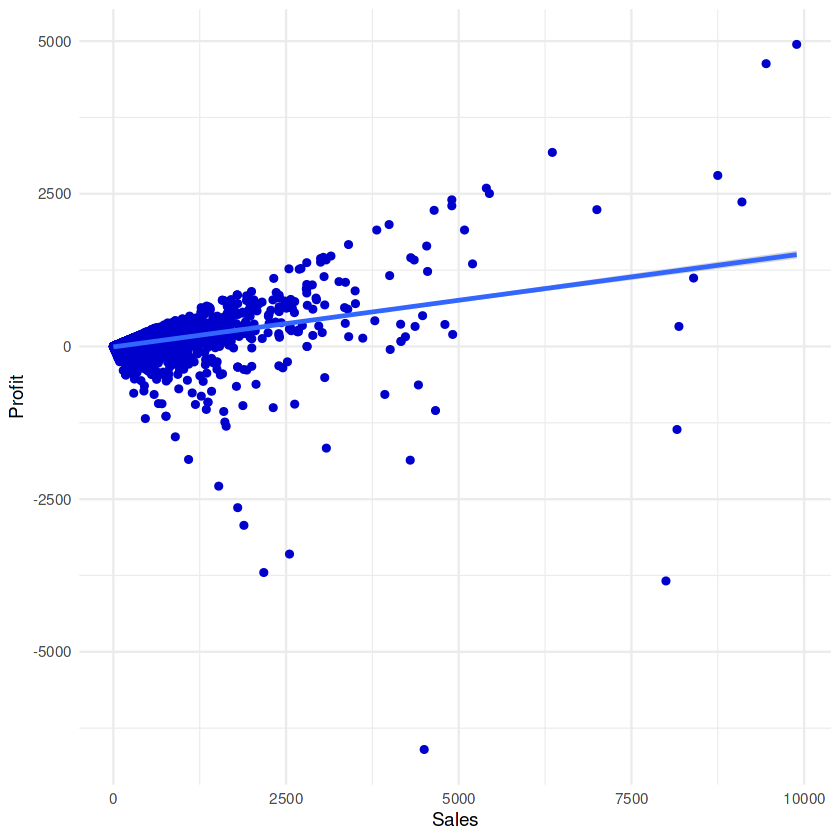

In [44]:
# Sales,Profit
ggplot(df, aes(Sales,Profit)) +
geom_point(col = "blue3") +
geom_smooth(method = 'lm') +
theme_minimal()

`geom_smooth()` using formula = 'y ~ x'


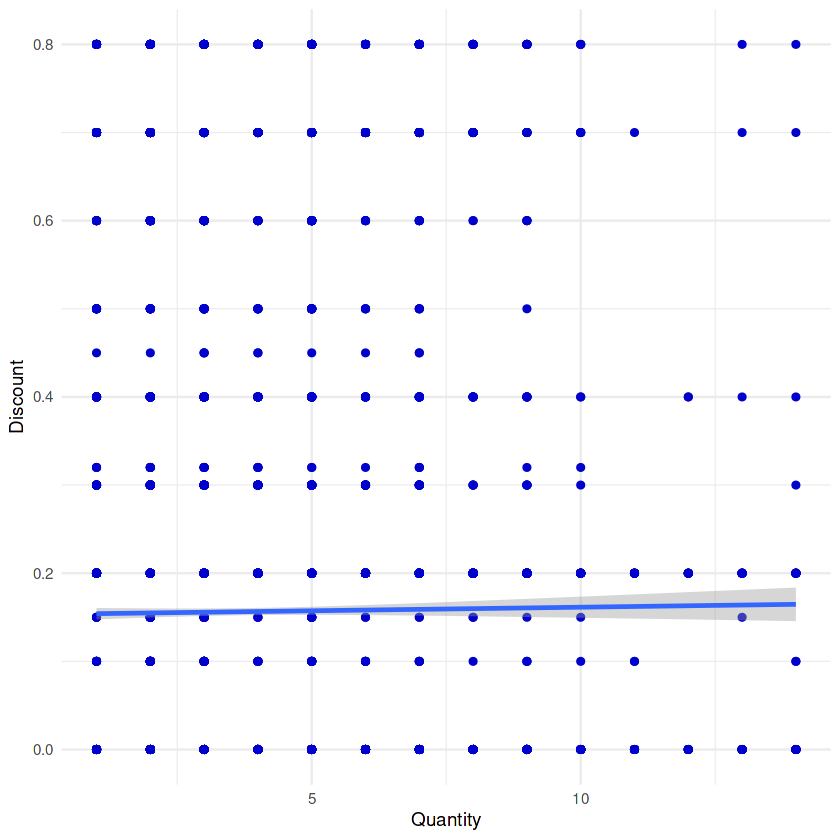

In [45]:
# Quantity,Discount
ggplot(df, aes(Quantity,Discount)) +
geom_point(col = "blue3") +
geom_smooth(method = 'lm') +
theme_minimal()

`geom_smooth()` using formula = 'y ~ x'


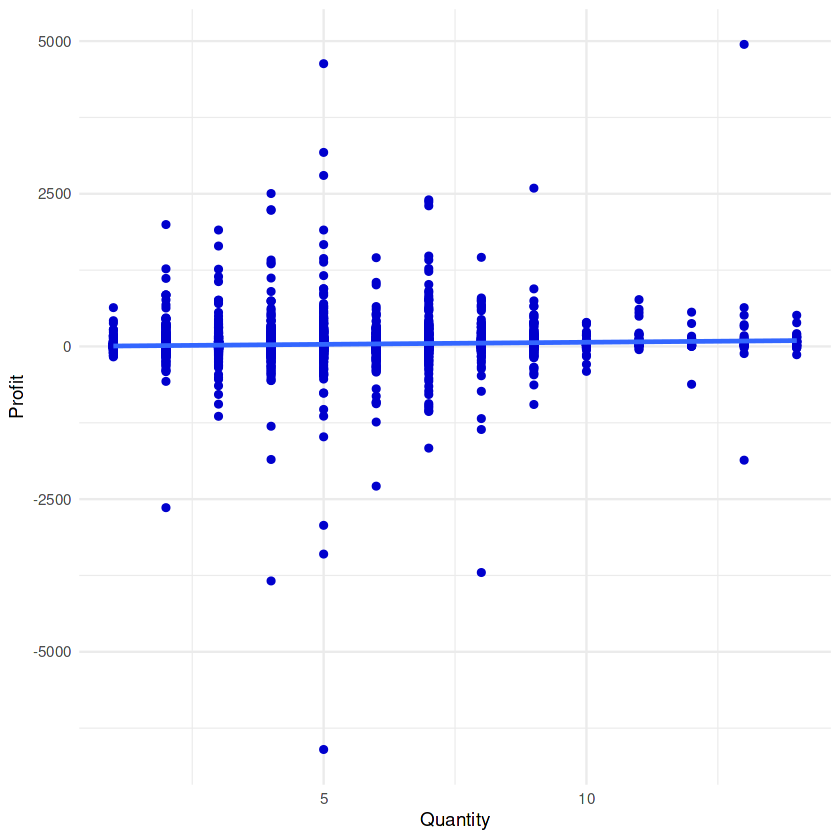

In [46]:
# Quantity,Profit
ggplot(df, aes(Quantity,Profit)) +
geom_point(col = "blue3") +
theme_minimal() +
geom_smooth(method = 'lm')

`geom_smooth()` using formula = 'y ~ x'


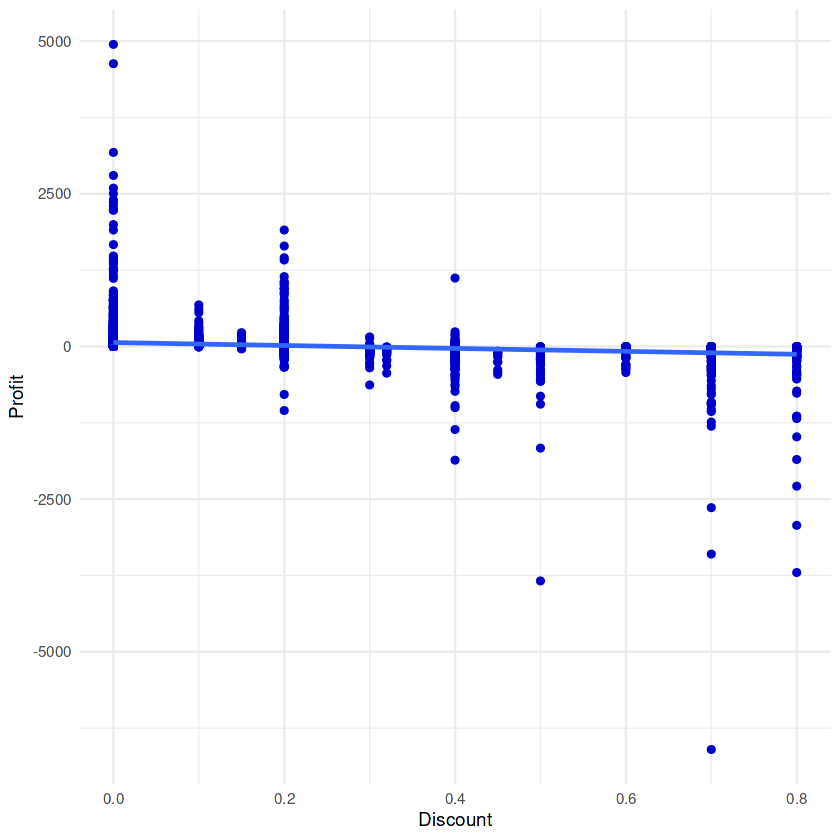

In [47]:
# Discount,Profit
ggplot(df, aes(Discount,Profit)) +
geom_point(col = "blue3") +
geom_smooth(method = 'lm') +
theme_minimal()

`geom_smooth()` using formula = 'y ~ x'


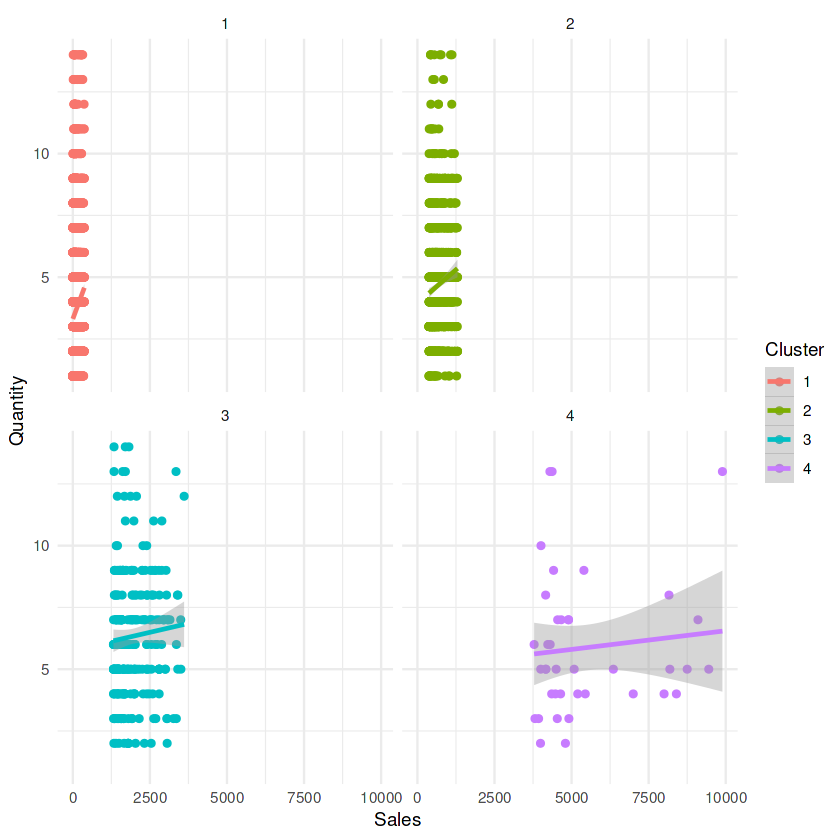

In [48]:
# Sales,Quantity group by Cluster
ggplot(df, aes(Sales,Quantity, col = Cluster)) +
geom_point() +
geom_smooth(method = 'lm') +
theme_minimal() +
facet_wrap( ~Cluster, ncol=2) 

`geom_smooth()` using formula = 'y ~ x'


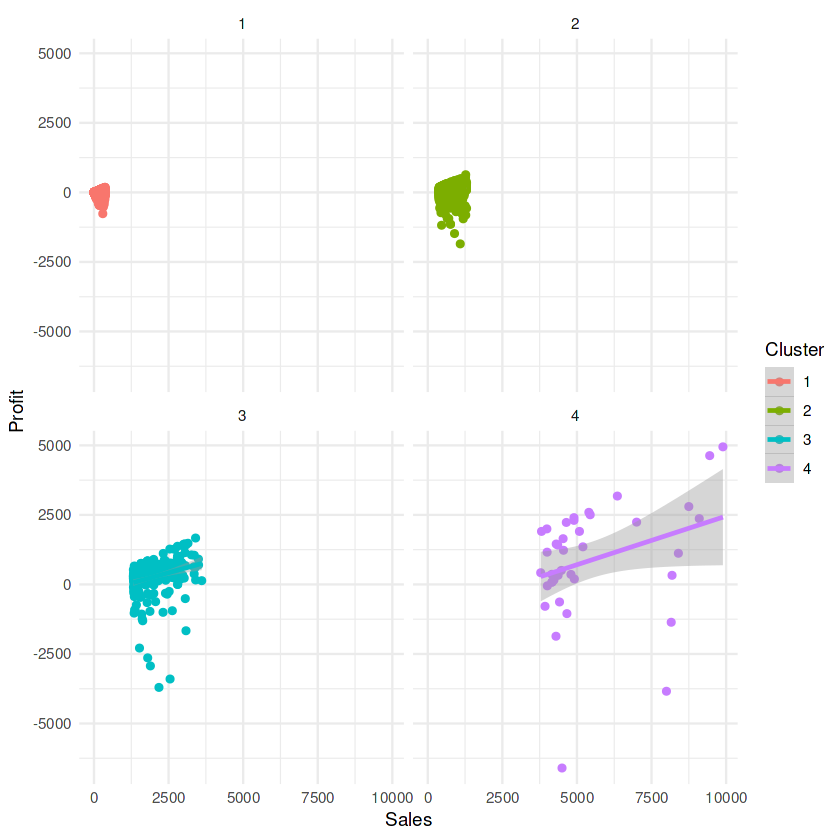

In [49]:
# Sales,Profit group by Cluster
ggplot(df, aes(Sales,Profit, col = Cluster)) +
geom_point() +
geom_smooth(method = 'lm') +
theme_minimal() +
facet_wrap( ~Cluster, ncol=2)


#### Conclusion:
* #### Sales and Quantity have the strong postive relationship.
* #### Sales and Profit have the positive relationship.
* #### Only cluster 4 products made increasing profit.

## Performing Classification Analysis


In [50]:
# subset specific data from df
df_subset <- df %>% 
select(Cluster,Sales,Quantity,Discount,Profit) %>%
as_tibble()

In [51]:
# split data
set.seed(21)
n <- nrow(df)
id <- sample(1:n, size = n*0.8)
train_data <- df_subset[id, ]
test_data <- df_subset[-id, ]

### KNN model

In [52]:
# train knn model
set.seed(42)

ctrl <- trainControl(
  method = "cv", 
  number = 5
)

(knn_model <- train(Cluster ~ .,
               data = train_data,
               method = "knn",
               preProcess = c("center","scale"),
               metric = "Accuracy",
               trControl = ctrl))

k-Nearest Neighbors 

7982 samples
   4 predictor
   4 classes: '1', '2', '3', '4' 

Pre-processing: centered (4), scaled (4) 
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 6386, 6386, 6385, 6386, 6385 
Resampling results across tuning parameters:

  k  Accuracy   Kappa    
  5  0.9810825  0.9292011
  7  0.9803305  0.9261181
  9  0.9793281  0.9219892

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 5.

In [53]:
## predict model 
p_knn <- predict(knn_model, newdata = test_data)

In [54]:
## score model
(score_knn <- confusionMatrix( factor(p_knn), factor(test_data$Cluster),
                mode = "prec_recall"))

acc_knn <- Accuracy(p_knn, test_data$Cluster)

Confusion Matrix and Statistics

          Reference
Prediction    1    2    3    4
         1 1698   12    0    0
         2    5  216    3    0
         3    0    5   50    1
         4    0    0    0    6

Overall Statistics
                                         
               Accuracy : 0.987          
                 95% CI : (0.981, 0.9915)
    No Information Rate : 0.8532         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.949          
                                         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4
Precision              0.9930   0.9643  0.89286 1.000000
Recall                 0.9971   0.9270  0.94340 0.857143
F1                     0.9950   0.9453  0.91743 0.923077
Prevalence             0.8532   0.1167  0.02655 0.003507
Detection Rate         0.8507   0.1082  0.02505 0.003006
Detection Prevalence   0.8567

### Desicion tree model

In [55]:
# train model
set.seed(88)

ctrl <- trainControl(
  method = "cv", 
  number = 5
)

(dt_model <- train(Cluster ~ .,
               data = train_data,
               method = "rpart",
               preProcess = c("center","scale"),
               metric = "Accuracy",
               trControl = ctrl))

CART 

7982 samples
   4 predictor
   4 classes: '1', '2', '3', '4' 

Pre-processing: centered (4), scaled (4) 
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 6386, 6384, 6387, 6386, 6385 
Resampling results across tuning parameters:

  cp          Accuracy   Kappa    
  0.02553871  0.9982467  0.9935842
  0.16679968  0.9802049  0.9266120
  0.80766161  0.8937422  0.3545772

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.02553871.

In [56]:
# predict model 
p_dt <- predict(dt_model, newdata = test_data)

In [57]:
# score model
(score_dt <- confusionMatrix( factor(p_dt), factor(test_data$Cluster),
                mode = "prec_recall"))

acc_dt <- Accuracy(p_dt, test_data$Cluster)

Warning message in levels(reference) != levels(data):
“longer object length is not a multiple of shorter object length”
Warning message in confusionMatrix.default(factor(p_dt), factor(test_data$Cluster), :
“Levels are not in the same order for reference and data. Refactoring data to match.”


Confusion Matrix and Statistics

          Reference
Prediction    1    2    3    4
         1 1703    0    0    0
         2    0  233    0    0
         3    0    0   53    7
         4    0    0    0    0

Overall Statistics
                                          
               Accuracy : 0.9965          
                 95% CI : (0.9928, 0.9986)
    No Information Rate : 0.8532          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9864          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4
Precision              1.0000   1.0000  0.88333       NA
Recall                 1.0000   1.0000  1.00000 0.000000
F1                     1.0000   1.0000  0.93805       NA
Prevalence             0.8532   0.1167  0.02655 0.003507
Detection Rate         0.8532   0.1167  0.02655 0.000000
Detection Prevalence

### Random forest model

In [58]:
# train model
mtry_grid <- data.frame(mtry = 2:4)

(rf_model <- train(Cluster ~ .,
               data = train_data,
               method = "rf",
               preProcess = c("center","scale"),
               metric = "Accuracy",
               tuneGrid = mtry_grid,
               trControl = ctrl))

Random Forest 

7982 samples
   4 predictor
   4 classes: '1', '2', '3', '4' 

Pre-processing: centered (4), scaled (4) 
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 6387, 6385, 6386, 6385, 6385 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
  2     0.9998748  0.9995402
  3     0.9998748  0.9995402
  4     0.9997495  0.9990811

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.

In [59]:
## predict model 
p_rf <- predict(rf_model, newdata = test_data)

In [60]:
# score model
(score_rf <- confusionMatrix( factor(p_rf), factor(test_data$Cluster),
                mode = "prec_recall"))
acc_rf <- Accuracy(p_rf, test_data$Cluster)

Confusion Matrix and Statistics

          Reference
Prediction    1    2    3    4
         1 1703    0    0    0
         2    0  233    0    0
         3    0    0   53    0
         4    0    0    0    7

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.9982, 1)
    No Information Rate : 0.8532     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4
Precision              1.0000   1.0000  1.00000 1.000000
Recall                 1.0000   1.0000  1.00000 1.000000
F1                     1.0000   1.0000  1.00000 1.000000
Prevalence             0.8532   0.1167  0.02655 0.003507
Detection Rate         0.8532   0.1167  0.02655 0.003507
Detection Prevalence   0.8532   0.1167  0.02655 0.003507
Balanced

## Model comparison

In [61]:
acc_models <- c(acc_knn,
                    acc_dt,
                    acc_rf)

models <- c("KNN","DecisionTree","RandomForest")

(compare_models <- data.frame(model = models,accuracy = acc_models))

model,accuracy
<chr>,<dbl>
KNN,0.9869739
DecisionTree,0.9964930
RandomForest,1.0000000


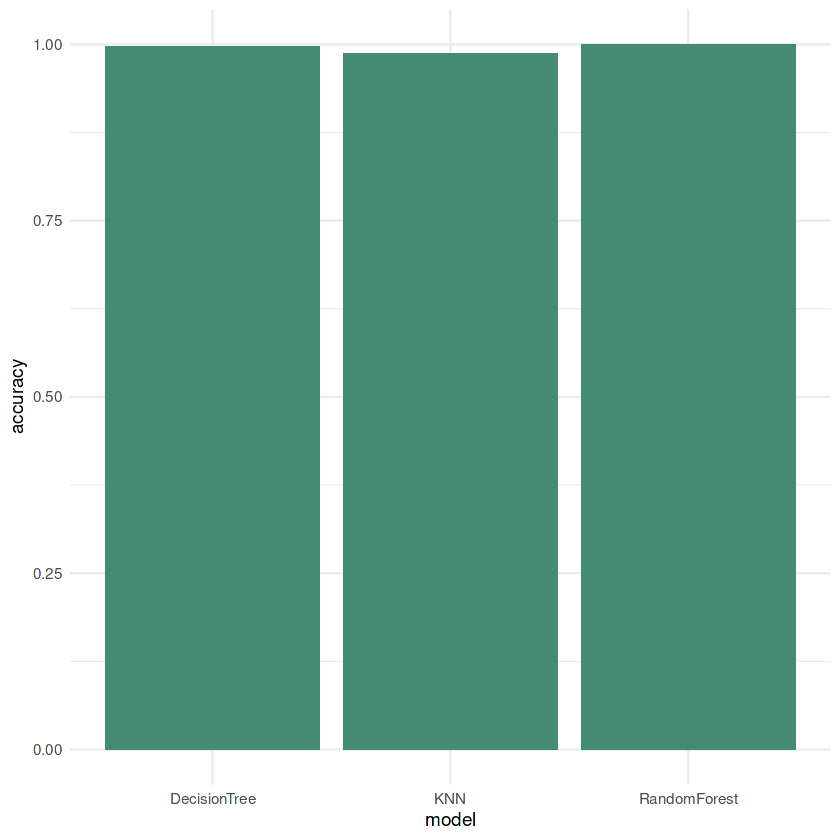

In [62]:
# visualize result
compare_models %>% 
ggplot( aes(model,accuracy)) +
geom_col(fill = "aquamarine4") +
theme_minimal()

#### Conclusion:
* #### Random Forest model has accuracy score equal to 1 which is the most accuracy score compare to Decision Tree and KNN model.